# My first data analysis project

In [1]:
# importing packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

## Loading the Titanic dataset

In [2]:
titanic_file_path="datasets/train.csv"
df = pd.read_csv(titanic_file_path)
df = df.drop(columns={'PassengerId'})

In [3]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Describing the dataframe

In [4]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data types of each column

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


## Counting missing values

In [6]:
df.isna().sum() 

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

## Handling missing values

### filling the na values in the age
* filling age with its median for null values

In [7]:
median_age = df['Age'].median()
# df['Age'].isnull().sum()
df.fillna(median_age,inplace=True)
df['Age'].isnull().sum()

df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,28.0,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,28.0,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,28.0,S


### Dropping the cabin column as it has about 77% of data are missing

In [8]:
df.drop('Cabin',axis=1,inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [9]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [10]:
df.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

### Duplicated values

In [11]:
df.duplicated().sum()

np.int64(0)

### Distribution of Ages

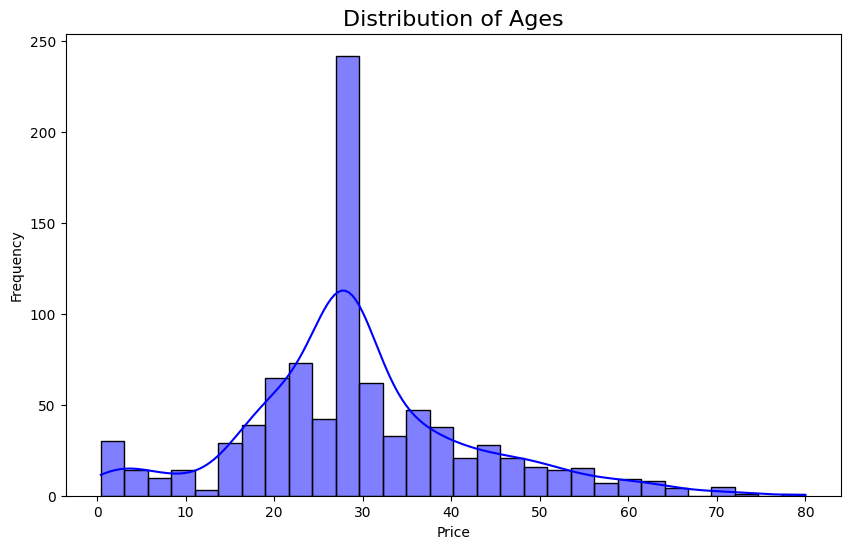

In [12]:
plt.figure(figsize=(10,6))
sns.histplot(df['Age'],kde=True,color='blue',bins=30)
plt.title('Distribution of Ages',fontsize=16)
plt.xlabel('Price')
plt.ylabel("Frequency")
plt.show()

* Shows a slight +ve skewness

### Scatter plot

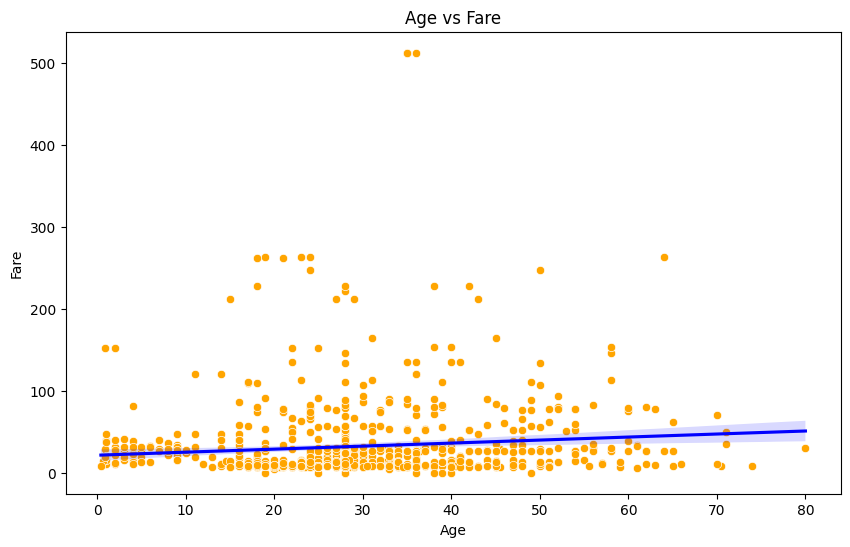

In [13]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age',y='Fare',data=df,color='orange')
sns.regplot(x='Age',y='Fare',data=df,scatter=False,color='blue')
plt.title('Age vs Fare')
plt.show()

### Distribution of Fares

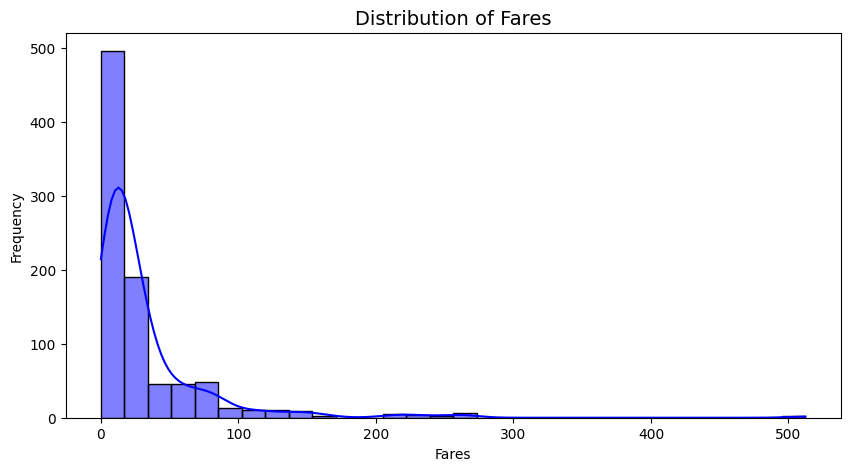

In [14]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'],kde=True,color='blue',bins=30)
plt.title('Distribution of Fares',fontsize=14)
plt.xlabel('Fares')
plt.ylabel('Frequency')
plt.show()

* shows highly +ve skewness

### Survival Rate 

In [15]:
survival_counts = df['Survived'].value_counts()
total_passengers = len(df)
survived = survival_counts[1]
died = survival_counts[0]
# survival_counts
survival_rate = survived/total_passengers
death_rate =died/total_passengers
print(f"Total Passengers: {total_passengers}")
print(f"Survived: {survived}")
print(f"Died: {died}")
print(f"Survival Rate: {survival_rate:.2%}")
print(f"Death Rate: {death_rate:.2%}")

Total Passengers: 891
Survived: 342
Died: 549
Survival Rate: 38.38%
Death Rate: 61.62%


### Visulaization of Survival Rate

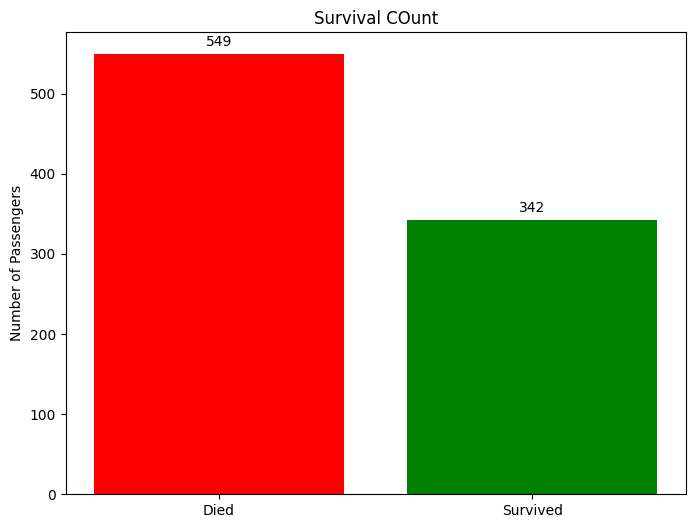

In [16]:
plt.figure(figsize=(8,6))
survival_counts = df['Survived'].value_counts()
labels = ['Died','Survived']
plt.bar(labels,survival_counts.values,color=['red','green'])
plt.title('Survival COunt')
plt.ylabel('Number of Passengers')
for i,v in enumerate(survival_counts.values):
    plt.text(i,v+10,str(v),ha='center')
plt.show()

### Did higher percentage of men or women survived?

In [17]:
df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [18]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])
# This labelEncoder will encode the male -> 1 and female-> 0

df.head(1)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,1


### Male Survival Rate

In [19]:
total_male = df.Sex_encoded.loc[df.Sex_encoded== 1].count()
male_survived = df.Sex_encoded.loc[(df.Sex_encoded==1) & df.Survived == 1 ].count()

print(f"Total male passengers:{total_male}")
print(f"Survived Male passengers:{male_survived}")
print(f"Male Passenger Survival Rate: {male_survived/total_male:.2%}")

Total male passengers:577
Survived Male passengers:109
Male Passenger Survival Rate: 18.89%


### Female Survival Rate

In [20]:
total_female = df.Sex_encoded.loc[df.Sex_encoded == 0].count()
female_survived = df.Sex_encoded.loc[(df.Sex_encoded ==0)&df.Survived ==1].count()

print(f"Total Female Passengers: {total_female}")
print(f"Total Female Passenger Survived: {female_survived}")
print(f"Female Passenger Survival Rate: {female_survived/total_female:.2%}")

Total Female Passengers: 314
Total Female Passenger Survived: 233
Female Passenger Survival Rate: 74.20%


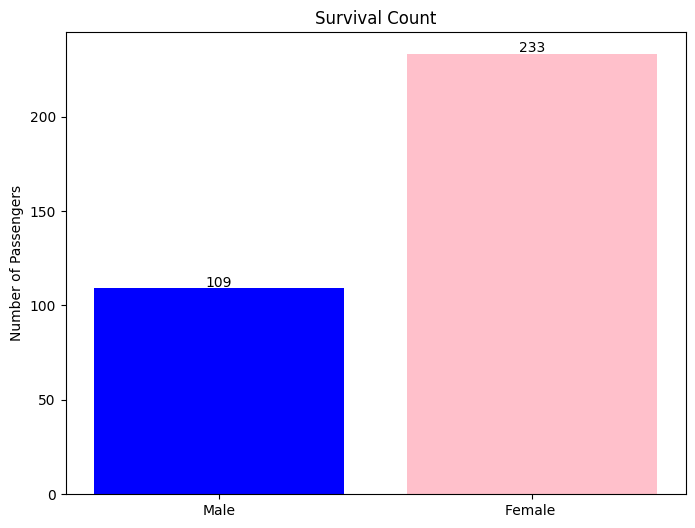

In [21]:
plt.figure(figsize=(8,6))

labels = ['Male','Female ']
plt.bar(labels,[male_survived,female_survived],color=['blue','pink'])
plt.title('Survival Count')
plt.ylabel('Number of Passengers')
for i,v in enumerate([male_survived,female_survived]):
    plt.text(i,v+1,str(v),ha='center')
plt.show()

### Conclusion:
Looks like Female Passenger Survived more than that of Male Passengers

# Did people in certain passenger classes (Pclass) have a higher chance of survival?

In [22]:
total_pclass3 = df.Pclass.loc[df.Pclass == 3].count()
total_pclass2 = df.Pclass.loc[df.Pclass == 2].count()
total_pclass1 = df.Pclass.loc[df.Pclass == 1].count()

print(f"Total Passenger in Class 3: {total_pclass3}")
print(f"Total Passenger in Class 2: {total_pclass2}")
print(f"Total Passenger in Class 1: {total_pclass1}")

total_passenger_survived_p3 = df.Pclass.loc[(df.Pclass==3)&(df.Survived==1)].count()
total_passenger_survived_p2 = df.Pclass.loc[(df.Pclass==2)&(df.Survived==1)].count()
total_passenger_survived_p1 = df.Pclass.loc[(df.Pclass==1)&(df.Survived==1)].count()

print(f"Survival rate of Passenger in Pclass 3: {total_passenger_survived_p3/total_pclass3:.2%}")
print(f"Survival rate of Passenger in Pclass 2: {total_passenger_survived_p2/total_pclass2:.2%}")
print(f"Survival rate of Passenger in Pclass 1: {total_passenger_survived_p1/total_pclass1:.2%}")

Total Passenger in Class 3: 491
Total Passenger in Class 2: 184
Total Passenger in Class 1: 216
Survival rate of Passenger in Pclass 3: 24.24%
Survival rate of Passenger in Pclass 2: 47.28%
Survival rate of Passenger in Pclass 1: 62.96%


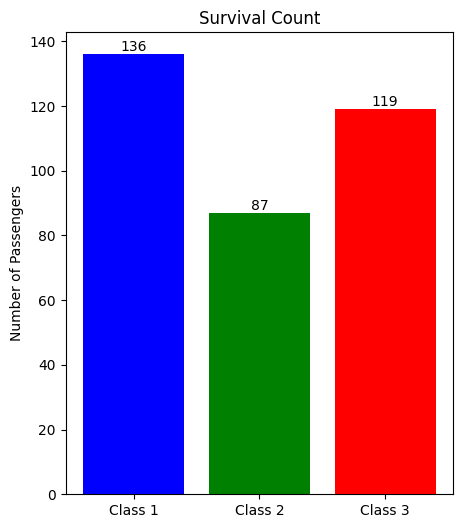

In [23]:
plt.figure(figsize=(5,6))

labels = ['Class 1','Class 2','Class 3']
plt.bar(labels,[total_passenger_survived_p1,total_passenger_survived_p2,total_passenger_survived_p3],color=['blue','green','red'])
plt.title('Survival Count')
plt.ylabel('Number of Passengers')
for i,v in enumerate([total_passenger_survived_p1,total_passenger_survived_p2,total_passenger_survived_p3]):
    plt.text(i,v+1,str(v),ha='center')
plt.show()

### Coclusion: 

* seems like class 1 passenger has higher survival rate

# Building Machine Learning Model

In [24]:
features = ['Pclass','Sex_encoded','Age','Fare']
X = df[features]
y = df['Survived']

## Splitting the data

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.2,random_state=42)

## fitting the model ( Linear Regression Model)

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Prediction from the model

In [27]:
y_pred = model.predict(X_test)

## Evaluation 

In [28]:
from sklearn.metrics import r2_score, mean_absolute_error,accuracy_score,confusion_matrix
r2 = r2_score(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
print(f"R2 score: {r2:.2f}")
print(f"mae score: {mae:.2f}")

R2 score: 0.43
mae score: 0.29


In [29]:
import joblib

joblib.dump(model,"ML_model/Linear_regression.pkl")

['ML_model/Linear_regression.pkl']

### Calculating the models accuracy

# #accuracy = accuracy_score(y_test,y_pred)

* caused an error as the linear regression is used for regression problems where the values are a continuous
* for ex: house price prediction, person's age prediction

## Logisitic Regression for Classification Problem

* predicting discrete category or class
* like predicting if email is "spam" or "not spam"
* if tumour is "maligant" or "bengin"

* which is best for this problem that is titanic survival

## Logistic Regression Model

In [30]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear')

# Train the model
log_model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


## Prediction using logistic regression model

In [31]:
y_pred=log_model.predict(X_test)

## Calculate the accuracy of the model

In [32]:
accuracy = accuracy_score(y_test,y_pred)
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 78.21%


### Dumping the logistic regression model

In [33]:
joblib.dump(log_model,'ML_model/Logistic_regression.pkl')

['ML_model/Logistic_regression.pkl']

### considering we have not handled outliers

## Confusion Matrix

In [34]:
conf_matrix = confusion_matrix(y_test,y_pred)

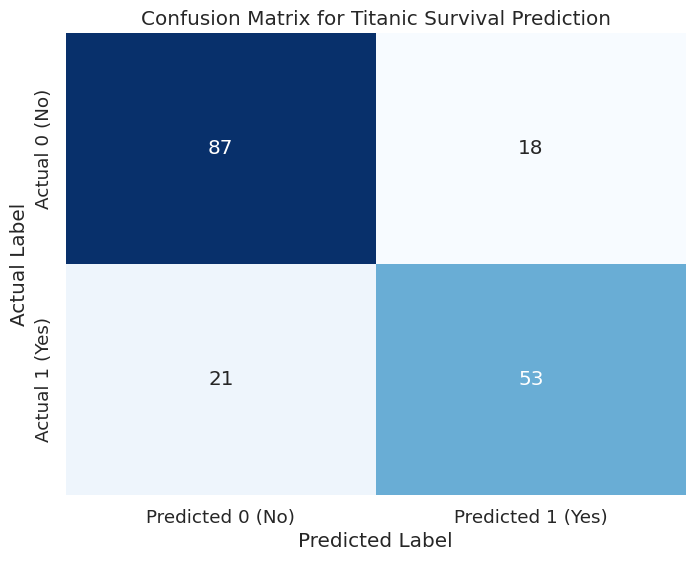

In [35]:
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0 (No)', 'Actual 1 (Yes)'], columns=['Predicted 0 (No)', 'Predicted 1 (Yes)'])
sns.set(font_scale=1.2)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion Matrix for Titanic Survival Prediction')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

# Extracting Info through Feature engineering

## Family Size

In [36]:
df['FamilySize'] = df['SibSp'] + df['Parch'] +1
df.FamilySize

0      2
1      2
2      1
3      2
4      1
      ..
886    1
887    1
888    4
889    1
890    1
Name: FamilySize, Length: 891, dtype: int64

In [37]:
df["IsAlone"] = (df['FamilySize']==1).astype(int)

In [38]:
df.IsAlone

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: IsAlone, Length: 891, dtype: int64

In [39]:
labels = ['Child','Teen','Adult','Senior']
df['AgeGroup'] =pd.cut(df['Age'],bins=[0,12,18,65,100],labels=labels)
df.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_encoded,FamilySize,IsAlone,AgeGroup
469,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,C,0,4,0,Child


## Correlation Matrix

<Axes: >

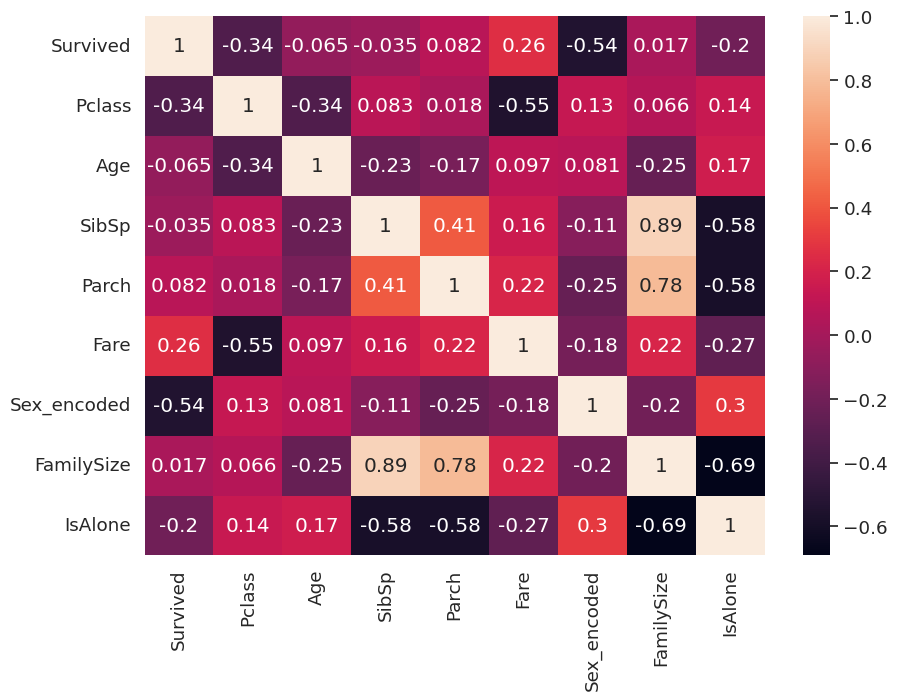

In [40]:
numerical_cols = df.select_dtypes(include='number').columns

correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10,7))
sns.heatmap(correlation_matrix,annot=True)

## Cross Validation 

In [41]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_model,X,y,cv=5)
print(f"CV accuracy: {cv_scores.mean():.3f}(+/- {cv_scores.std() * 2:.3f})")

CV accuracy: 0.789(+/- 0.045)


## Testing the model using the test dataset

In [42]:
test_df = pd.read_csv('datasets/test.csv')
test_df['Sex_encoded'] = le.transform(test_df['Sex'])
test_df.fillna(median_age,inplace=True)
Xt = test_df[features]
yt = log_model.predict(Xt)
test_df['Survived_Prediction'] = yt

In [43]:
died =test_df.Survived_Prediction.loc[test_df.Survived_Prediction==0].count()
print(f"No. of death predicted: {died}")
survived = test_df.Survived_Prediction.loc[test_df.Survived_Prediction == 1].count()
print(f"No. of Survived Prediction: {survived}\n")

predicted_survival_rate = survived/ test_df.PassengerId.count()
predicted_death_rate = died/ test_df.PassengerId.count()
print(f"Training Survival  Rate: {survival_rate:.2%}")
print(f"Training Death Rate: {death_rate:.2%}\n")
print(f"Predicted survival rate : {predicted_survival_rate:.2%}")
print(f"Predicted death rate : {predicted_death_rate:.2%}")

No. of death predicted: 264
No. of Survived Prediction: 154

Training Survival  Rate: 38.38%
Training Death Rate: 61.62%

Predicted survival rate : 36.84%
Predicted death rate : 63.16%


# Hypothesis Testing
* Hypothesis (H0) : There is no difference in survival rates between passenger class
* Alternate (H1) : There is significant difference in survival rates between passenger class

In [47]:
# Using ANOVA test
from scipy.stats import f_oneway
alpha = 0.05
class1_survival = df[df['Pclass']==1]['Survived']
class2_survival = df[df['Pclass']==2]['Survived']
class3_survival = df[df['Pclass']==3]['Survived']

f_stat,p_value = f_oneway(class1_survival,class2_survival,class3_survival)
print(f"ANOVA F-stat: {f_stat:.4f}")
print(f"P-value: {p_value:.6f}")

if p_value < alpha:
    print(f"Passenger class significantly affects the Survival rate")
else:
    print("Passenger class does not affects the Survival rate")


ANOVA F-stat: 57.9648
P-value: 0.000000
Passenger class significantly affects the Survival rate


# Conclusion:
## This data clearly shows that the higher class passenger was major factor in Titanic survival rates